An important topic in regulatory capital modelling in banking is the concept of credit risk. Credit risk is the loss to a bank's portfolio of loans when their customers start to default on their loans (i.e., not pay their loan repayments, or missing their repayments). These loans can be home loans, credit cards, car loans, personal loans, corporate loans, etc. (i.e., mortgages, revolving lines of credit, retail loans, whole sale loans). Credit risk is also related to securitized products and a a related post is on capital modelling as applied to securitized financial products.

Typically, expected loss (i.e., credit risk) is given as follows,

          EL=PD×LGD×EAD

where ELEL is Expected Loss, PDPD is Probability of Default, LGDLGD is Loss Given Default, and EADEAD is Exposure at Default.

According to F-IRB (Foundation-Internal Ratings Based) banks calculate their own PDPD risk parameter, while the other risk parameters such as LGDLGD and EADEAD are provided by the nation's banking supervisor (i.e., APRA in Australia, the FED/OCC in US, PRA in UK) except for retail exposures. The Basel A-IRB (Advanced-Internal Ratings Based) allows banks to calculate all of their own risk parameters subject to certain regulatory guidelines. More details can be found from the Bank of International Settlements (BIS)

Since mortgages are an important component of a bank's lending activity and business, we explore a mortgage dataset from Kaggle. In the Kaggle dataset, we are given information on customers of a bank and whether or not they have defaulted on their home loans. Thus, the task at hand is modelling the probability of default PDPD. As PDPD is a basic modelling requirement of credit risk modelling, this is an excellent introduction into credit risk.

Machine Learning applications are made up of the following steps

1 . Exploratory Data Analysis (EDA)

2 . Feature Engineering

3 . Machine Learning Algorithm Selection

4 . Hyper-parameter tuning


EDA is an exercise where we explore the dataset given and perform several tasks

Understand your training and test datasets

1 . How big is your training and test datasets? How many datatypes are there in your datasets?

2 . Is there missing data in your datasets? How many features have more than 50% of data missing?

3 . Do you have categorical datasets? How many unique categories in each categorical feature? Do you need to perform label-encoding or one-hot encoding?

4 . Do you have erroneous/outlier data in your features? Do you need to replace these outlier/erroneous points with a NaN?

5 . What do your two population distributions (i.e., TARGET=0 and TARGET=1) look like for each feature? For each population distribution, does any feature have KDEs/Histograms that are graphically/statistically different?

6 . What are the features that exhibit the highest +ve and -ve correlations with your TARGET data?

7 . For features that exhibit the highest +ve/-ve correlations with the TARGET data, do they exhibit correlations with each other?

8 . Are there any interesting features that should be explored further as to how they impact the TARGET data?
Does your training and test datasets need to be aligned?


# Importing required modules

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pickleshare

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/application_test.csv


# Reading in training and test datasets
We read in the datasets and change the directories depending on whether I am using my Windows or ChromeOS machine. I create an additional copy of the training and test datasets as I will be making many adjustments to the dataframes and would like to compare them with the original

In [ ]:
df_app_train=pd.read_csv('../input/home-credit-default-risk/application_train.csv',index_col=0)
df_app_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv',index_col=0)
df_app_train_origin = df_app_train.copy()
df_app_test_origin = df_app_test.copy()

# Comparing training and test datasets
Comparing both training and test datasets where column 0 is the training dataset and column 1 is test dataset. We see that the training dataset is un balanced and is as large as 570MB with a 121 columns, whereas the test dataset is 90MB with 120 columns as it does not include the TARGET column. The command also prints out the categorical features in both dataets.

Also returned is the missing value info in the dataset. We see that 67 columns in the training dataset are missing values, which is about 55% of the total number of features available. 41 columns have a critical number of missing values which means that there are more than 50% of rows in the feature with missing values.


In [ ]:
df_app_train_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [ ]:
print(df_app_test_origin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 45.0+ MB
None


In [ ]:
a= df_app_train_origin.select_dtypes(include=['object']).copy()
b=df_app_test_origin.select_dtypes(include=['object']).copy()

In [ ]:
c=a['NAME_INCOME_TYPE'].unique()
print(c)
#maternity is present

['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


Comparing feature columns that differ between test and training datasets because there may be categorical variables that are non-existent in the testing dataset but exist in the training dataset. We can see that for the CODE_GENDER column the training dataset (i.e., DF1) has 4 entries denoted as XNA that are non-existent in the test dataset. Likewise in the NAME_INCOME_TYPE feature, Maternity Leave exists 5 times in the training dataset but does not exist in the test dataset. Thus, the function produces all feature categorical columns that have different categories between the training and test datasets.



In [ ]:
d=b['NAME_INCOME_TYPE'].unique()
print(d)
#maternity is not present

['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']


# Label encoding
Label encoding is when we have a 2-state categorical variable (i.e., Y/N, M/F) where we replace these with 1s and 0s (i.e., Y=1/N=0, M=1/F=0). One-hot encoding is when we have we create a separate feature for each category (i.e., Y, N, M, F) and where you have Y, the feature column of Y will be 1 and feature column of N is 0.

We perform label encoding for 2-state categorical variables due reduce the size of the feature set, and perform one-hot encoding for categories with N-states for accuracy.

We see below that for the training (test) dataset, x3 (x4) columns were 2-state categorical variables. This is because as found in the previous analysis on "Comparing training and test" datasets, we found that in the training dataset, the CODE_GENDER has an additional categorical entry labeled XNA that does not exist in the test dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_app_train['NAME_CONTRACT_TYPE'] = le.fit_transform(df_app_train['NAME_CONTRACT_TYPE'])
df_app_train['FLAG_OWN_CAR'] = le.fit_transform(df_app_train['FLAG_OWN_CAR'])
df_app_train['FLAG_OWN_REALTY'] = le.fit_transform(df_app_train['FLAG_OWN_REALTY'])

df_app_test['NAME_CONTRACT_TYPE'] = le.fit_transform(df_app_test['NAME_CONTRACT_TYPE'])
df_app_test['FLAG_OWN_CAR'] = le.fit_transform(df_app_test['FLAG_OWN_CAR'])
df_app_test['FLAG_OWN_REALTY'] = le.fit_transform(df_app_test['FLAG_OWN_REALTY'])
df_app_test['CODE_GENDER']=le.fit_transform(df_app_test['CODE_GENDER']) 

In [ ]:
df_app_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# One-hot encoding
One-hot encoding is performed by the get_dummies function in Pandas.

In [ ]:
df_app_train = pd.get_dummies(df_app_train)
df_app_test = pd.get_dummies(df_app_test)

In [ ]:
df_app_test.shape


(48744, 237)

In [ ]:
df_app_train.shape

(307511, 242)

We would like to see what the feature differences are between the training and test datasets.We create a set to store what the feature differences are between the training and test datasets. A set is a datatype that can only accept unique entries. Thus, we find find the additional features that the training dataset has above the test dataset are to do with the NAME_INCOME_TYPE_Maternity leave, NAME_FAMILY_STATUS Unknown, and CODE_GENDER_M/F/XNA.

In [ ]:
app_train_col = set(df_app_train.columns)
app_test_col = set(df_app_test.columns)

exc_col = app_train_col-app_test_col
print(len(exc_col))
print(exc_col)

6
{'TARGET', 'NAME_FAMILY_STATUS_Unknown', 'CODE_GENDER_F', 'CODE_GENDER_XNA', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_Maternity leave'}


# Aligning training & test datasets
We need to align both the training and testing datasets to have the same number of features, otherwise the machine learning technique does not work if both datasets have different sets of features.

Thus, we store the TARGET column in another variable as we need it to be in the training dataset. In the align function, we are performing an INNER join on the axis=1 that are the columns so it will only retain features that exist in both datasets. We then add in the TARGET column back to the training dataset.

In [ ]:
train_target_labels = df_app_train['TARGET']
df_app_train_align, df_app_test_align = df_app_train.align(df_app_test,join='inner',axis=1)
df_app_train_align['TARGET'] = train_target_labels

In [ ]:
df_app_train_align.shape

(307511, 237)

In [ ]:
df_app_test_align.shape

(48744, 236)

We can evalaute the difference between the features of the aligned test & training datasets compared to before alignment. We can see that to maintain consistency between both the test and training datasets, all data associated to CODE_GENDER_M/F/XNA and NAME_INCOME_TYPE_Maternity Leave and NAME_FAMILY_STATUS_Unknown are removed.

# Analyzing the DAYS_EMPLOYED feature for errors
We can investigate DAYS_EMPLOYED with greater detail and find that it has a maximum value of 365243 which does not make sense as this corresponds to a 1000 years (i.e., noone can be employed for a 1000 years).

In [ ]:
df_app_train_align['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

How often does this erroneous value occur? 55374 times in the DAYS_EMPLOYED column.

In [ ]:
maxVal = max(df_app_train_align['DAYS_EMPLOYED'])
numErrorVal = df_app_train_align[df_app_train_align['DAYS_EMPLOYED']==maxVal].shape[0]
print(numErrorVal)

55374


# Correlation analysis
The simplest analysis to evalute which are the most important features relevant to TARGET is correlation. We obtain a correlation matrix of the training dataset, and sort it to see the features that have the highest positive and negative correlation with TARGET.

For +ve correlation, DAYS_BIRTH and REGION_RATING_CLIENT_x are highest, but have a low magnitude since correlation is around 0.06-0.07.

For -ve correlation, we have sronger results as the EXT_SOURCE-x are between -0.15-0.18.

In [ ]:
df_app_train_corr = df_app_train_align.corr()
df_app_train_corr_target = df_app_train_corr['TARGET'].sort_values()
print('+ve corr: \n{0}'.format(df_app_train_corr_target.tail(20)))
print('-ve corr: \n{0}'.format(df_app_train_corr_target.head(20)))


+ve corr: 
NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.0574

# Population distribution graphical analysis
We extract the list of top 10 positive and negatively correlated features to TARGET and plot the graphical KDEs/Histograms to see how the shapes of the TARGET=1 and TARGET=0 population distributions differ for these more salient features.

In [ ]:
var_pos_corr_list = df_app_train_corr_target.head(10).index.values
var_neg_corr_list = df_app_train_corr_target[-2:-10:-1].index.values

print(var_pos_corr_list)
print('----------------')
print(var_neg_corr_list)

['EXT_SOURCE_3' 'EXT_SOURCE_2' 'EXT_SOURCE_1'
 'NAME_EDUCATION_TYPE_Higher education' 'NAME_INCOME_TYPE_Pensioner'
 'ORGANIZATION_TYPE_XNA' 'DAYS_EMPLOYED' 'FLOORSMAX_AVG' 'FLOORSMAX_MEDI'
 'FLOORSMAX_MODE']
----------------
['DAYS_BIRTH' 'REGION_RATING_CLIENT_W_CITY' 'REGION_RATING_CLIENT'
 'NAME_INCOME_TYPE_Working' 'DAYS_LAST_PHONE_CHANGE' 'DAYS_ID_PUBLISH'
 'REG_CITY_NOT_WORK_CITY'
 'NAME_EDUCATION_TYPE_Secondary / secondary special']


# Additional analysis for DAYS_EMPLOYED
A more careful analysis is made for DAYS_EMPLOYED by turning it into years which is easier to understand and synthesize. We see that the maximum is 50 years.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


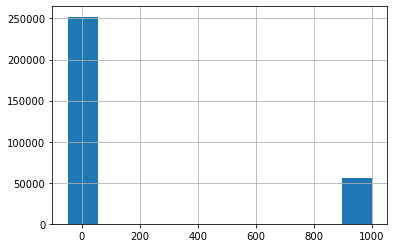

In [ ]:
daysEmp_data = df_app_train_align[['TARGET','DAYS_EMPLOYED']]
daysEmp_data.loc[:,'YEARS_EMPLOYED'] = daysEmp_data['DAYS_EMPLOYED']/365
daysEmp_data['YEARS_EMPLOYED'].hist()

In [ ]:
daysEmp_data['YEARS_BINNED'] = pd.cut(daysEmp_data['YEARS_EMPLOYED'],bins=np.linspace(-50,0,num=11))
daysEmp_group = daysEmp_data.groupby('YEARS_BINNED').mean()
daysEmp_group

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_BINNED,,,
"(-50.0, -45.0]",0.000000,-16862.916667,-46.199772
"(-45.0, -40.0]",0.004762,-15325.461905,-41.987567
"(-40.0, -35.0]",0.019231,-13517.634615,-37.034615
"(-35.0, -30.0]",0.041237,-11791.317526,-32.304980
"(-30.0, -25.0]",0.039903,-9960.885429,-27.290097
"(-25.0, -20.0]",0.047566,-8092.456438,-22.171114
"(-20.0, -15.0]",0.048457,-6306.064394,-17.276889
"(-15.0, -10.0]",0.057786,-4465.836653,-12.235169
"(-10.0, -5.0]",0.073740,-2629.270088,-7.203480


A barplot shows us that those who default most are usually have the lowest number of days/years in employment



Text(0.5, 0, 'Days Employed Groups (Years)')

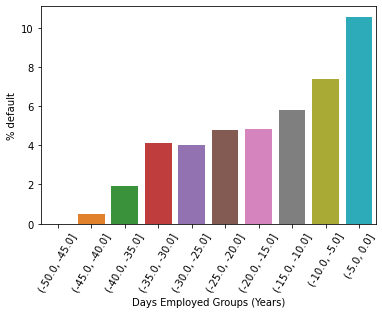

In [ ]:
import seaborn as sns
sns.barplot(daysEmp_group.index,daysEmp_group['TARGET']*100)
plt.xticks(rotation=60)
plt.ylabel('% default')
plt.xlabel('Days Employed Groups (Years)')


# Correlation heatmap of salient feature

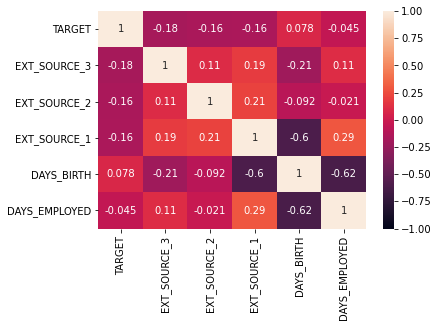

In [ ]:
df_ext_src = df_app_train_align[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED']] 
df_ext_src_corr = df_ext_src.corr()
sns.heatmap(df_ext_src_corr,vmin=-1.0,vmax=1.0,annot=True)

We want to create a pairplot and a pairgrid to have a graphical analysis of the most important features of the dataset. As the original dataset is quite large, we take a sample of it such that we remove all the rows that have NaN and then take a random sample of 5000 points.

We have a 6x6 grid in pairplot as TARGET is explicitly considered via the coloring scheme (i.e., hue). In this pairgrid TARGET is denoted by the hue. Orange is TARGET=1 (default), and Blue is TARGET=0 (no default).

The pairgrid can be explained as follows:

1 . Upper triangle: This is a scatter plot between the two variables in the X & Y axes, and has the TARGET variable as a different hue.

2 . Diagonal: This is a kde plot of the distribution of each variable.

3 . Bottom triangle: This is a kde plot.

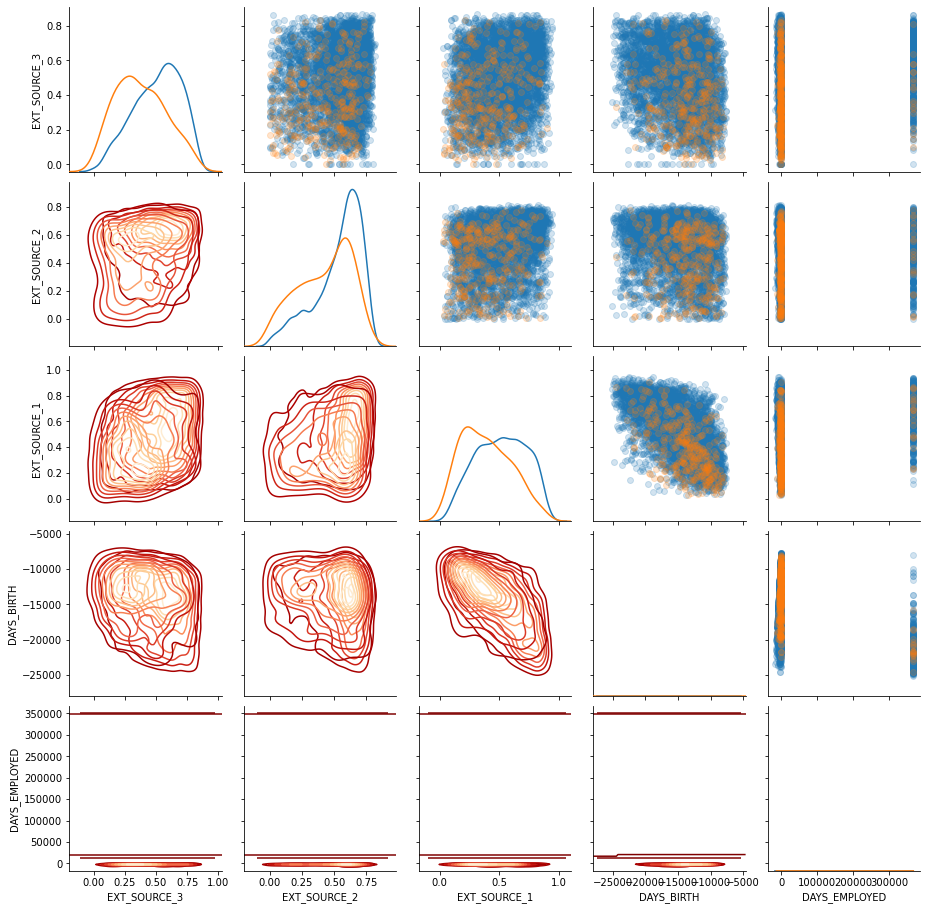

In [ ]:
df_ext_src_sample = df_ext_src.dropna().sample(5000)
grid = sns.PairGrid(data = df_ext_src_sample, diag_sharey=True,
                    hue = 'TARGET', 
                    vars = [x for x in list(df_ext_src_sample.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);